In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit.extensions import XGate
import math
from math import pi

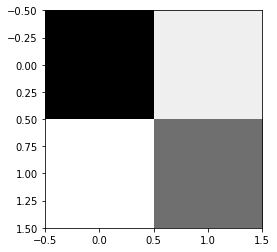

In [61]:
image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)
plt.imshow(image, cmap = 'gray')
signal = image.flatten()
signal = np.interp(signal, (0, 255), (0, np.pi))

In [62]:
color = QuantumRegister(len(signal), 'color')
classic = ClassicalRegister(color.size, 'classic')

qc = QuantumCircuit(color, classic)

for i, ang in enumerate(signal):
    qc.ry(ang, i)

qc.measure(list(reversed(range(len(signal)))), range(len(signal)))


Metrics

| Image size  | Depth measure | # of utilized qubits
| ------------- | ------------- | -------------------|
| 2  | 2  | 4 |
| 4  | 2  | 16 |
| 8  | 2  | 64 |
| 16  | 2  | 256 |
| 32  | 2  | 1024|
| 64  | 2  | 4096 |
| 128  | 2  | 16384 |
| 256  | 2  | 65536 |

In [63]:
print("depth is {}, # of qubits is {}".format(qc.depth(), qc.num_qubits))

depth is 2, # of qubits is 4


In [64]:
# qc.draw()

In [65]:
shots = 1000000
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc, aer_sim)
qobj = assemble(t_qc_image, shots=shots)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()

In [66]:
pixels = np.zeros((len(signal)))
for item in counts_neqr:
    for i, bit in enumerate(item):
        if bit=='0':
            pixels[i]+=counts_neqr[item]

In [67]:
reconstruct = []
for pixel in pixels:
    color = 2*np.arccos((pixel/shots)**(1/2))
    reconstruct.append(color)
    
for rec, real in zip(reconstruct, signal):
    print("reconstructed pixel value = {}, real = {}".format(rec, real))

reconstructed pixel value = 0.024166680027404103, real = 0.024639942381096416
reconstructed pixel value = 2.933235198611909, real = 2.9321531433504737
reconstructed pixel value = 3.131009598957555, real = 3.129272682399245
reconstructed pixel value = 1.3795588067265072, real = 1.3798367733413994
